In [358]:
from __future__ import unicode_literals

import requests
import json
import time
import codecs
import sys
from time import gmtime
import pandas as pd
import gensim
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
from string import punctuation
import nltk
import seaborn as sns
import plotly.plotly as py
from sklearn.preprocessing import Imputer
%matplotlib inline

In [45]:
# MeetUp information retrieval by API

UTF8Writer = codecs.getwriter('utf8')
sys.stdout = UTF8Writer(sys.stdout)

def main(city, state):
    
        api_key= "4744164f49612216157364d1294939"
        
        result = []
        per_page = 200
        offset = 0
        count = 0
        while count <= 10:
            response=get_results({"sign":"true","country":"US", "city": city, "state": state, "radius": 10, "key":api_key, "page":per_page, "offset":offset })
            time.sleep(1)
            offset += 1
#             print response
            result.extend(response['results'])
            count +=1
        time.sleep(1)
        return result

def get_results(params):
    request = requests.get("http://api.meetup.com/2/groups",params=params)
    data = request.json()
    
    return data

ny_data = main("New York", "NY")
ca_data = main("Los Angeles", "CA")
il_data = main("Chicago", "IL")
tx_data = main("Houston", "TX")
az_data = main("Phoenix", "AZ")

In [50]:
# Extend all the lists into one list

ny_data.extend(ca_data)
ny_data.extend(il_data)
ny_data.extend(tx_data)
ny_data.extend(az_data)

In [639]:
# Convert list into a pd.DataFrame

df = pd.DataFrame(ny_data)
# df.to_csv('meetup_data.csv', encoding='UTF-8', index=False)

In [662]:
df.shape

(8912, 23)

In [663]:
# Remove NJ from df

df = df[df['state'] != 'NJ']

In [664]:
df.columns

Index([u'category', u'city', u'country', u'created', u'description',
       u'group_photo', u'id', u'join_mode', u'lat', u'link', u'lon',
       u'members_', u'name', u'organizer', u'rating', u'state', u'timezone',
       u'topics', u'urlname', u'utc_offset', u'visibility', u'who',
       u'shortname'],
      dtype='object')

In [665]:
df.rename(columns={'members':'members_'}, inplace=True)

In [666]:
df_ny = df[df['state']=='NY']
df_la = df[df['state']=='LA']
df_ch = df[df['state']=='IL']
df_tx = df[df['state']=='TX']
df_az = df[df['state']=='AZ']

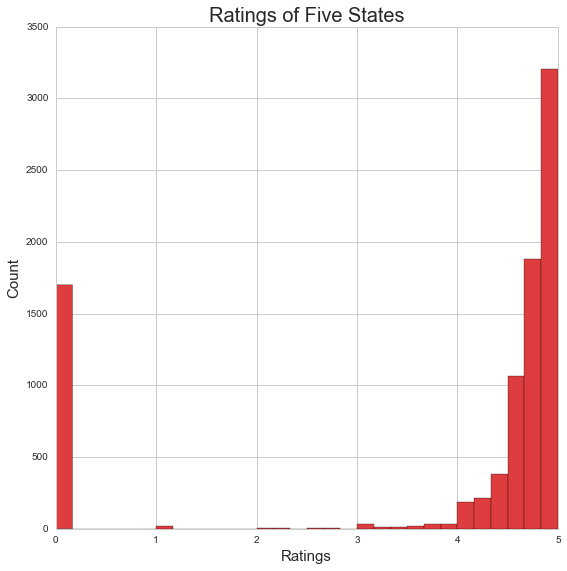

In [553]:
# Histogram of ratings

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = 9,9
plt.hist(df['rating'], color ='#DD3D3E', bins = 30)
plt.title('Ratings of Five States', fontsize=20)
plt.xlabel('Ratings', fontsize=15)
plt.ylabel('Count', fontsize=15)

In [ ]:
# # Distribution of Ratings per state

# g =sns.FacetGrid(df, hue='state', size=8)
# g.map(sns.kdeplot, 'rating', shade=True)
# g.add_legend(fontsize = 15)
# plt.title('Distribution of Ratings', fontsize=20)
# plt.xlabel('Ratings', fontsize=15)
# plt.ylabel('Density', fontsize=15)

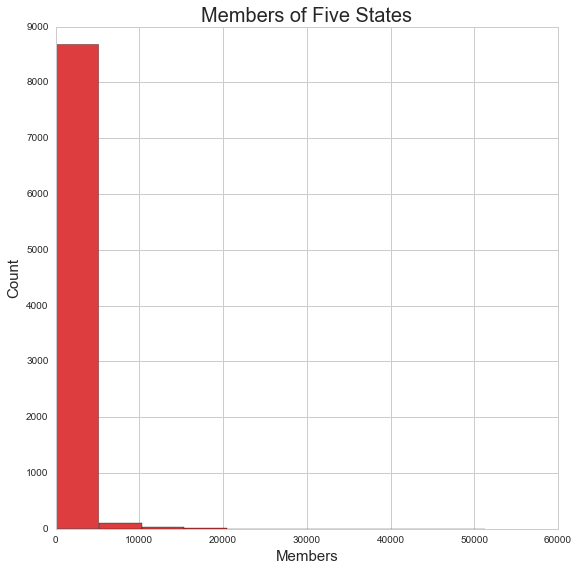

In [442]:
# Histogram of ratings

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = 9,9
plt.hist(df['members'], color ='#DD3D3E')
plt.title('Members of Five States', fontsize=20)
plt.xlabel('Members', fontsize=15)
plt.ylabel('Count', fontsize=15)

In [ ]:
# # Distribution of Ratings per state

# g =sns.FacetGrid(df, hue='state', size=8)
# g.map(sns.kdeplot, 'members', shade=True)
# g.add_legend(fontsize = 15)
# plt.title('Distribution of Members', fontsize=20)
# plt.xlabel('Members', fontsize=15)
# plt.ylabel('Density', fontsize=15)

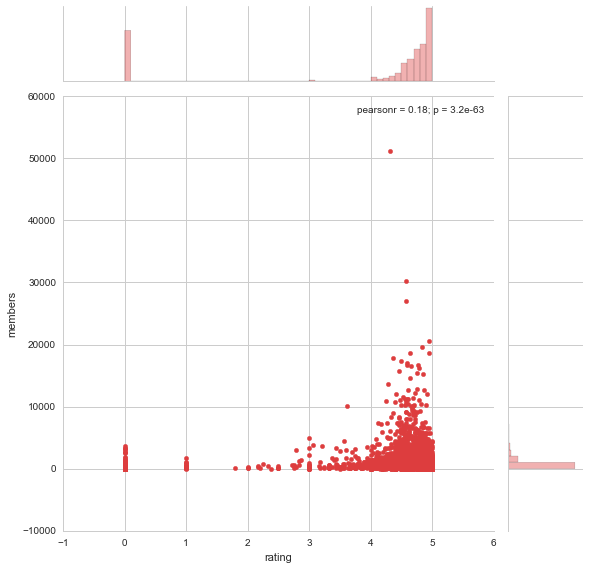

In [443]:
sns.set_style("whitegrid")
sns.jointplot(df['rating'],df['members'], color ='#DD3D3E', size = 8)

sns.set_style("whitegrid")
sns.boxplot(df['state'],df['members'])
sns.despine(left=True)

In [72]:
# Create copy

copy = df.copy()

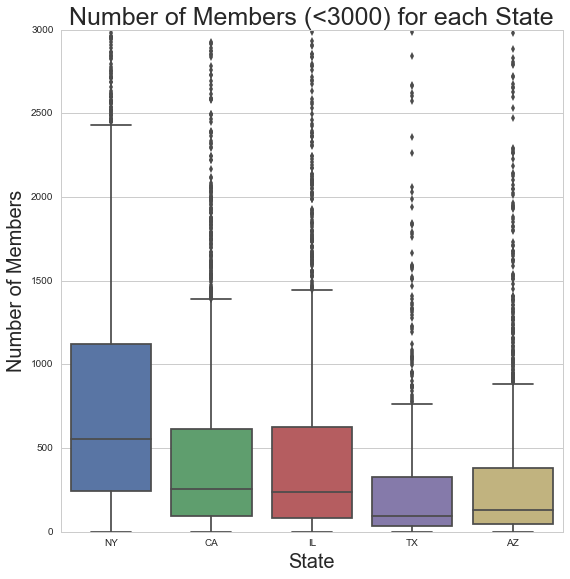

In [561]:
sns.boxplot(df['state'],df[df['members_']<3000]['members_'])
plt.title('Number of Members (<3000) for each State', fontsize = '25')
plt.ylabel('Number of Members', fontsize=20)
plt.xlabel('State', fontsize=20)

In [ ]:
# # Create chloropleth

# for col in copy.columns:
#     copy[col] = copy[col].astype(str)

# scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],
#        [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

# copy['text'] = "Members: "+copy['members']+"Average Rating: "+copy['rating']

# data = [dict(;'

#         type='choropleth',
#         colorscale = scl,
#         autocolorscale = False,
#         locations = copy['state'],
#         z = copy['rating'].astype(float),
#         locationmode = 'USA-states',
#         text = copy['text'],
#         marker = dict(
#             line = dict (
#                 color = 'rgb(255,255,255)',
#                 width = 2
#             )
#         ),
#         colorbar = dict(
#             title = "Millions USD"
#         )
#     ) ]

# layout = dict(
#         title = '2011 US Agriculture Exports by State<br>(Hover for breakdown)',
#         geo = dict(
#             scope='usa',
#             projection=dict( type='albers usa' ),
#             showlakes = True,
#             lakecolor = 'rgb(255, 255, 255)',
#         ),
#     )
    
# fig = dict( data=data, layout=layout )

# url = py.plot( fig, filename='d3-cloropleth-map' )

In [667]:
# Create function to create a category column

def short(x):
    try:
        return x['category']['shortname'].encode('ascii', errors='ignore')
    except:
        return 'NaN'

In [668]:
df['shortname'] = df.apply(short,axis=1)

In [652]:
# Categories and ratings df

cat_rat = df[['shortname', 'rating','members_','state']]

In [653]:
cat_rat

,shortname,rating,members_,state
0,movies-film,3.93,273,NY
1,career-business,3.70,2634,NY
2,photography,4.45,2907,NY
3,government-politics,3.45,525,NY
4,sci-fi-fantasy,4.49,644,NY
5,tech,4.34,8279,NY
6,games,3.80,1686,NY
7,sci-fi-fantasy,4.14,1061,NY
8,tech,4.13,4034,NY
9,food-drink,4.58,10692,NY


In [ ]:
# set index of cat_rat to shortname

# cat_rat.set_index('shortname')

In [669]:
# Remove the zeros in cat_rat
names = list(set(cat_rat['shortname']))
del names[10]
def fill_na(x):
    if x['shortname'] == 'NaN':
        return np.random.choice(names)
    else:
        return x['shortname']

In [655]:
cat_rat['shortname'] = cat_rat.apply(fill_na, axis = 1)

/Users/tqrahman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [572]:
cat_rat_mem = cat_rat[['shortname','members_']].groupby('shortname').mean()

In [658]:
cat_rat.loc[cat_rat.shortname == "NaN",]

,shortname,rating,members_,state


In [450]:
cat_rat_count = cat_rat.groupby('shortname').count()

In [ ]:
cat_rat_count

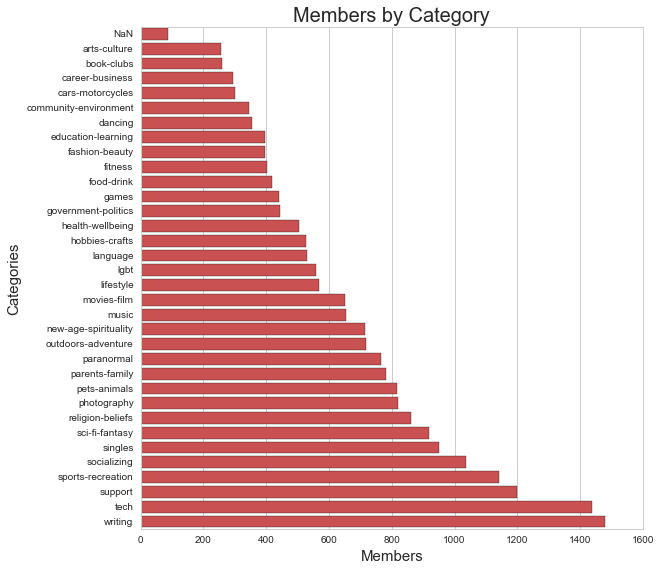

In [574]:
# Plot ratings for each category

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = 9,9
sns.barplot(sorted(cat_rat_mem.members_),cat_rat_mem.index, orient = 'h', color ='#DD3D3E')
plt.title('Members by Category', fontsize=20)
plt.xlabel('Members', fontsize=15)
plt.ylabel('Categories', fontsize=15)

In [670]:
df['shortname'] = df.apply(fill_na, axis=1)

In [660]:
df['shortname']

0                 movies-film
1             career-business
2                 photography
3         government-politics
4              sci-fi-fantasy
5                        tech
6                       games
7              sci-fi-fantasy
8                        tech
9                  food-drink
10                socializing
11       new-age-spirituality
12             sci-fi-fantasy
13                 book-clubs
14       new-age-spirituality
15                   language
16               pets-animals
17                photography
18          sports-recreation
19               pets-animals
20                   language
21                socializing
22        government-politics
23           religion-beliefs
24                   language
25                 food-drink
26                 food-drink
27                   language
28               pets-animals
29                movies-film
                ...          
8882         religion-beliefs
8883               food-drink
8884      

In [ ]:
df['description'][1]

In [671]:
# Function to remove html tags in the description column

import re

def striphtml(data):
    try:
        p = re.compile(r"<.*?>")
        w = p.sub('', data)
        w = [str(word) for word in w.split() if word.isalpha()]
        return w
    except:
        return ['NAN']

In [672]:
# Apply the striphtml function to every description row

df['description'] = df.apply(lambda x: striphtml(x['description']), axis = 1)

In [673]:
# Function to return length of list

def len_(x):
    return len(x)

In [674]:
# Apply the len_desc function onto df_clean

df['len_desc'] = df['description'].apply(len_)

In [675]:
# Function to convert epoch time to normal

def convert_time(x):
    return gmtime(x['created']/1000)

In [676]:
# convert epoch time into understandable time and put it into a new column

df['created'] = df.apply(convert_time, axis=1)

In [677]:
# Function to find out how old is the meetup

def old(x):
    return 2015-x['created'][0]

In [678]:
# Apply the old function to the created column

df['old'] = df.apply(old, axis=1)

In [511]:
# # Retrieve a list of all the clean topics from topics

# top_list = []
# for i in range(df.shape[0]):
#     try:
#         top_list.append([d['name'].encode('ascii', errors='ignore') for d in df['topics'][i]])
#     except:
#         top_list.append(["NaN"])
# df['topic_list'] = top_list

In [679]:
# Create function to create a list of topics

def topic(x):
    try:
        return [d['name'].encode('ascii', errors='ignore') for d in x['topics']]
    except:
        return ['NaN']

In [680]:
# Apply topic to the topics column

df['list_topics'] = df.apply(topic,axis=1)

In [681]:
df['len_topic'] = df['list_topics'].apply(len_)

In [682]:
df['list_topics'][0]

['Acting',
 'Film Industry',
 'Screenwriting',
 'Indie Films',
 'Social Networking',
 'Entertainment Industry',
 'Writing']

In [516]:
len(top_list)

8822

In [517]:
df['who'][0:5]

0    DIRECTORS ACTORS SCREENWRITERS
1                     Entrepreneurs
2                     Photographers
3                       Republicans
4               Trekkies / Trekkers
Name: who, dtype: object

In [518]:
# # Function to convert string into list

# def str_list(x):
#     newl = []
#     for i in x:
#         newl.append(i.encode('ascii', errors='ignore').lower().split())
#     return newl

In [683]:
def str_(x):
#     return x['who'].encode('ascii', errors='ignore').lower().split()
    try: 
        return x['who'].encode('ascii', errors='ignore').lower().split()
    except:
        return [str(x['who'])]
#     return [i.encode('ascii', errors='ignore').lower().split() for i in x['who']]

In [684]:
# Convert string in who into a list

df['who']=df.apply(str_,axis=1)

In [685]:
# Remove the punctuation from the who column

for ind, elem in enumerate(df['who']):
    for i in elem:
        if i in punctuation:
            elem.remove(i)

In [686]:
# Apply len to the who vector

df['len_who'] = df['who'].apply(len)

In [687]:
df.head()

,category,city,country,created,description,group_photo,id,join_mode,lat,link,...,urlname,utc_offset,visibility,who,shortname,len_desc,old,list_topics,len_topic,len_who
0,"{u'shortname': u'movies-film', u'name': u'movi...",New York,US,"(2002, 10, 8, 17, 22, 11, 1, 281, 0)",[],{u'thumb_link': u'http://photos1.meetupstatic....,61244,approval,40.750000,http://www.meetup.com/The-New-York-City-Filmma...,...,The-New-York-City-Filmmakers-Group,-14400000,members,"[directors, actors, screenwriters]",movies-film,0,13,"[Acting, Film Industry, Screenwriting, Indie F...",7,3
1,"{u'shortname': u'career-business', u'name': u'...",New York,US,"(2002, 10, 8, 17, 22, 11, 1, 281, 0)","[Anyone, who, runs, their, own, business, or, ...",{u'thumb_link': u'http://photos2.meetupstatic....,54628,open,40.750000,http://www.meetup.com/entrepreneur-23/,...,entrepreneur-23,-14400000,public,[entrepreneurs],career-business,25,13,"[Small Business, New In Town, Self-Improvement...",10,1
2,"{u'shortname': u'photography', u'name': u'phot...",New York,US,"(2002, 10, 8, 17, 22, 11, 1, 281, 0)","[Hi, Ed, the, organizer, of, this, Meetup, and...",{u'thumb_link': u'http://photos1.meetupstatic....,120182,open,40.740002,http://www.meetup.com/NYPhotoSafari/,...,NYPhotoSafari,-14400000,public,[photographers],photography,357,13,"[Digital Photography, Photography, Photography...",15,1
3,"{u'shortname': u'government-politics', u'name'...",New York,US,"(2002, 10, 8, 17, 22, 11, 1, 281, 0)","[We, are, a, Political, and, Social, primarily...",{u'thumb_link': u'http://photos3.meetupstatic....,131291,open,40.750000,http://www.meetup.com/Republican-Party-NYC/,...,Republican-Party-NYC,-14400000,public,[republicans],government-politics,95,13,"[Republican Party, Libertarian, Conservatives,...",11,1
4,"{u'shortname': u'sci-fi-fantasy', u'name': u's...",New York,US,"(2002, 10, 8, 17, 22, 14, 1, 281, 0)","[This, Meetup, Group, is, for, Trekkies, Trekk...",{u'thumb_link': u'http://photos3.meetupstatic....,147811,open,40.750000,http://www.meetup.com/nystartrek/,...,nystartrek,-14400000,public,"[trekkies, trekkers]",sci-fi-fantasy,17,13,[Star Trek],1,2


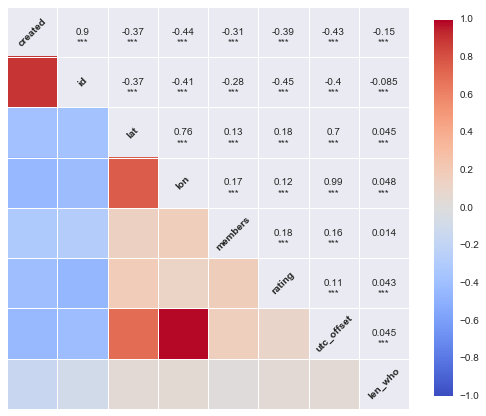

In [313]:
sns.corrplot(df)

In [564]:
# Impute the missing values of 

temp = df[df['rating'] != 0]

In [565]:
rat_mean = np.mean(temp['rating'])

In [566]:
rat_mean

4.721138725077206

In [688]:
def imp_mean(x):
    if x['rating'] == 0:
        return rat_mean
    else:
        return x['rating']

In [689]:
df['ratings'] = df.apply(imp_mean,axis=1)

In [690]:
# Dumify the join_mode category and concat it with df

j_mode = pd.get_dummies(df['join_mode'])
df = pd.concat([df, j_mode], axis=1)

In [691]:
# Dumify the shortname and concat with df

short = pd.get_dummies(df['shortname'])
df = pd.concat([df, short], axis=1)

In [692]:
# Dumify the visibility and concat with df

vis = pd.get_dummies(df['visibility'])
df = pd.concat([df, vis], axis =1)

In [693]:
# Dumify the state and concat with df

state = pd.get_dummies(df['state'])
df = pd.concat([df, state], axis =1)

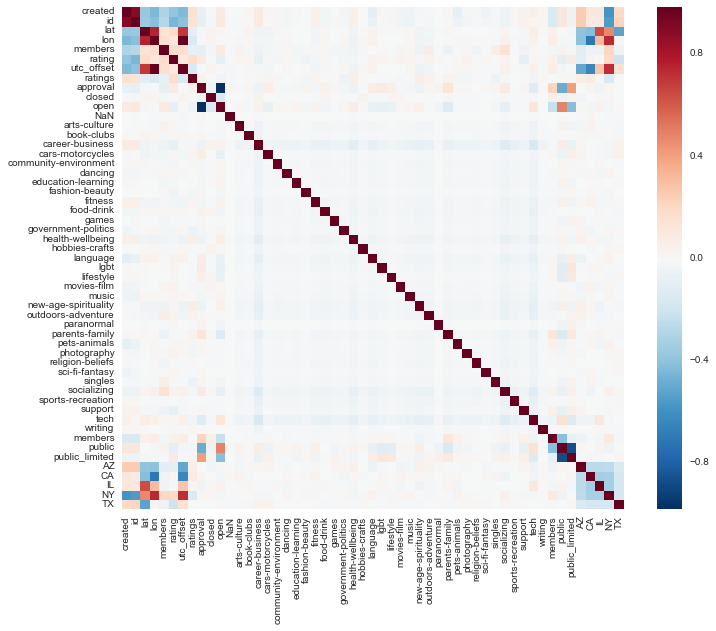

In [422]:
plt.subplots(figsize=(12, 9))
sns.heatmap(df.corr(), vmax=.8, square=True)

In [533]:
df['members_']

0         273
1        2634
2        2907
3         525
4         644
5        8279
6        1686
7        1061
8        4034
9       10692
10       1471
11       1447
12        380
13        298
14       1345
15        881
16       1303
17       9057
18       2713
19        577
20        233
21       1323
22        331
23        585
24      10066
25       2472
26      10360
27       1476
28       1071
29       2430
        ...  
8882        5
8883       78
8884       11
8885       19
8886       39
8887        3
8888       18
8889       17
8890       33
8891        2
8892       35
8893       37
8894       16
8895       41
8896       29
8897       29
8898       36
8899        8
8900       23
8901        8
8902        5
8903        4
8904        2
8905        1
8906        1
8907        5
8908        1
8909        1
8910        1
8911        1
Name: members_, dtype: int64

In [534]:
df.columns[23:75]

Index([             u'len_desc',                   u'old',
                 u'list_topics',             u'len_topic',
                     u'len_who',               u'ratings',
                    u'approval',                u'closed',
                        u'open',                   u'NaN',
                u'arts-culture',            u'book-clubs',
             u'career-business',      u'cars-motorcycles',
       u'community-environment',               u'dancing',
          u'education-learning',        u'fashion-beauty',
                     u'fitness',            u'food-drink',
                       u'games',   u'government-politics',
            u'health-wellbeing',        u'hobbies-crafts',
                    u'language',                  u'lgbt',
                   u'lifestyle',           u'movies-film',
                       u'music',  u'new-age-spirituality',
          u'outdoors-adventure',            u'paranormal',
              u'parents-family',          u'pets-animals

In [696]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import cross_validation as cv
from sklearn import grid_search as gs

In [761]:
rf_df = df.drop(['category','utc_offset', 'created','city'], axis=1)

In [762]:
rf_df['memb_'] = rf_df['members_']

In [763]:
rf_df = rf_df.drop('members_', axis=1)

In [773]:
rf_df = rf_df.drop(['country','description','group_photo','id','join_mode','link','name',
                    'organizer','state','timezone','topics','urlname','visibility','who',
                    'shortname','list_topics'], axis=1)

In [ ]:
rf_df.columns

In [812]:
X = rf_df.iloc[:,:52]
Y = rf_df.iloc[:,-1]

In [813]:
x_train, x_test, y_train, y_test = cv.train_test_split(X,Y,train_size = 0.7, random_state=0)

In [814]:
print len(x_train)
print len(y_train)

6175
6175


In [815]:
x_train.shape

(6175, 52)

In [816]:
rf = RandomForestRegressor()
grid_para_forest = [{"n_estimators": [10, 50, 100], \
                    "min_samples_leaf": range(1, 6), "min_samples_split": np.linspace(2, 30, 15)}]
grid_search = gs.GridSearchCV(rf, grid_para_forest, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{u'n_estimators': [10, 50, 100], u'min_samples_split': array([  2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,  22.,
        24.,  26.,  28.,  30.]), u'min_samples_leaf': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [817]:
grid_search.best_params_

{u'min_samples_leaf': 4, u'min_samples_split': 24.0, u'n_estimators': 50}

In [818]:
grid_search.best_score_

0.26315511625283877

In [790]:
# grid_forest = [{"n_estimators": [50,100],
#                 "max_depth":[4,5,6],
#                 "max_features":[53]}]
# # grid_s = gs.GridSearchCV(rf, grid_forest, cv=5)
# grid_s.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{u'n_estimators': [50, 100], u'max_features': [53], u'max_depth': [4, 5, 6]}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [791]:
grid_s.best_params_

{u'max_depth': 6, u'max_features': 53, u'n_estimators': 50}

In [792]:
grid_s.best_score_

0.98900939821326628

In [820]:
rf.set_params(n_estimators=50,
              max_features=52,
              max_depth=6)
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features=52, max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [821]:
print "The training error of random forest is: %.5f" %(1-rf.score(x_train, y_train))
print "The test     error of random forest is: %.5f" %(1-rf.score(x_test, y_test))

The training error of random forest is: 0.58624
The test     error of random forest is: 0.85654


In [822]:
rf.feature_importances_

array([  4.72614314e-02,   2.18572543e-02,   6.82516806e-02,
         9.62625311e-02,   3.18792054e-01,   1.63507754e-01,
         2.03156895e-02,   5.55916765e-02,   1.36521935e-02,
         2.95898257e-05,   3.12921821e-02,   3.00964799e-03,
         1.45408191e-05,   7.17558410e-03,   0.00000000e+00,
         2.96211549e-04,   1.21793511e-06,   1.29434949e-04,
         1.01882791e-02,   1.33719901e-04,   8.45609840e-04,
         3.04672825e-06,   9.16490514e-04,   6.23095529e-08,
         2.96899632e-05,   8.71390126e-04,   1.06990969e-04,
         2.69745759e-04,   1.92196447e-03,   1.72251578e-02,
         3.02555872e-04,   1.93609137e-02,   1.21870327e-07,
         1.96037865e-06,   8.22000047e-06,   3.27537197e-04,
         2.61678211e-05,   9.18239696e-05,   1.15102004e-02,
         6.82546422e-02,   3.75247566e-04,   4.43106043e-04,
         1.56303392e-03,   7.34682925e-04,   1.32324263e-04,
         3.03284965e-03,   8.66339256e-04,   3.86207211e-04,
         3.98570890e-03,

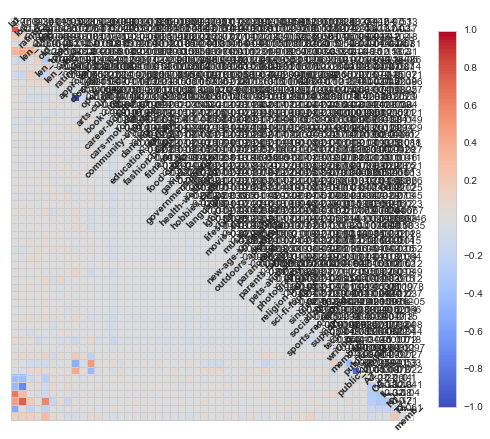

In [801]:
sns.corrplot(rf_df)

In [ ]:
plt.subplots(figsize=(12, 9))
sns.heatmap(rf_df.corr(), vmax=.8, square=True)

In [811]:
rf_df.columns

Index([                  u'lat',                   u'lon',
                      u'rating',              u'len_desc',
                         u'old',             u'len_topic',
                     u'len_who',               u'ratings',
                    u'approval',                u'closed',
                        u'open',          u'arts-culture',
                  u'book-clubs',       u'career-business',
            u'cars-motorcycles', u'community-environment',
                     u'dancing',    u'education-learning',
              u'fashion-beauty',               u'fitness',
                  u'food-drink',                 u'games',
         u'government-politics',      u'health-wellbeing',
              u'hobbies-crafts',              u'language',
                        u'lgbt',             u'lifestyle',
                 u'movies-film',                 u'music',
        u'new-age-spirituality',    u'outdoors-adventure',
                  u'paranormal',        u'parents-family

Feature ranking:
lat. feature 4 (0.318792)
lon. feature 5 (0.163508)
rating. feature 3 (0.096263)
len_desc. feature 39 (0.068255)
old. feature 2 (0.068252)
len_topic. feature 7 (0.055592)
len_who. feature 0 (0.047261)
ratings. feature 10 (0.031292)
approval. feature 1 (0.021857)
closed. feature 6 (0.020316)
open. feature 31 (0.019361)
arts-culture. feature 29 (0.017225)
book-clubs. feature 8 (0.013652)
career-business. feature 38 (0.011510)
cars-motorcycles. feature 18 (0.010188)
community-environment. feature 13 (0.007176)
dancing. feature 51 (0.004596)
education-learning. feature 48 (0.003986)
fashion-beauty. feature 45 (0.003033)
fitness. feature 11 (0.003010)
food-drink. feature 50 (0.002426)
games. feature 28 (0.001922)
government-politics. feature 49 (0.001621)
health-wellbeing. feature 42 (0.001563)
hobbies-crafts. feature 22 (0.000916)
language. feature 25 (0.000871)
lgbt. feature 46 (0.000866)
lifestyle. feature 20 (0.000846)
movies-film. feature 43 (0.000735)
music. feature 4

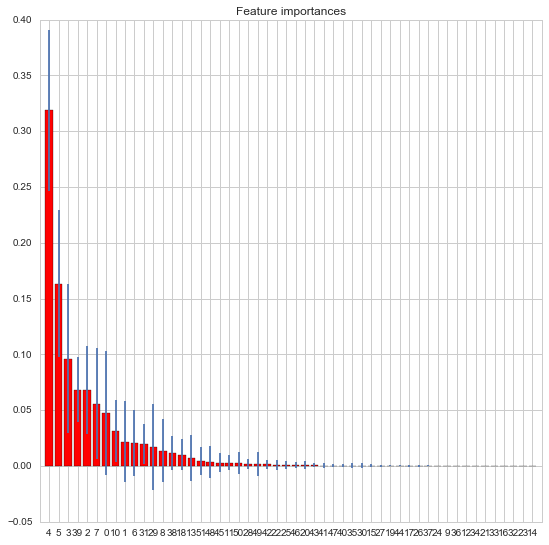

In [827]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%s. feature %d (%f)" % (rf_df.columns[f], indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()